## __1 - Business Problem__  
___1) Extract tweets for any user (try choosing a user who has more tweets)___  
___2) Perform sentimental analysis on the tweets extracted from the above___  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import PorterStemmer
import string

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
tweets = pd.read_csv('Elon_musk.csv',engine="python",encoding='latin1',error_bad_lines=False)

<ipython-input-3-fbaa3761278c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets = pd.read_csv('Elon_musk.csv',engine="python",encoding='latin1',error_bad_lines=False)


In [4]:
tweets.Text[10]

'@GiveDirectly Just sent some'

In [5]:
tweets = [Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets= [Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
# Joining the list into one string/text
text = ' '.join(tweets)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [9]:
## tokenization - convert paragraph to words and focus on word
sentences=nltk.sent_tokenize(text)

In [10]:
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [11]:
type(sentences)

list

## clean the entire text from sentences

In [12]:
corpus=[]
for i in range (len(sentences)):
    review =re.sub('[^a-zA-Z]',' ',sentences[i])
    review=review.lower()
    corpus.append(review)

In [13]:
corpus

[' kunalb   i m an alien  id aa carmack ray tracing on cyberpunk with hdr is next level ',
 'have you tried it ',
 ' joerogan  spotify great interview ',
 ' gtera   doge is underestimated  teslacn congratulations tesla china for amazing execution last year ',
 'now on to the next for even more  ',
 'happy new year of the ox ',
 'https   t co  wfkmyu oj frodo was the underdoge  all thought he would fail  himself most of all ',
 'https   t co zgxjfdzzrm  owensparks   flcnhvy  anonyx   haha thanks     flcnhvy  anonyx   indeed ',
 'tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely  givedirectly just sent some just agree to do clubhouse with  kanyewest https   t co  rwe uhsts  geoffkeighley  unrealengine it s getting real bought some dogecoin for lil x  so he can be a toddler hodler  joshmanmode he definitely has issues  but the sentencing seems a bit high  freewalletorg thanks for fixing  freewalletorg please unlock my accou

In [14]:
stemmer =PorterStemmer()
## apply stemming
for i in corpus:
    words=nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(stemmer.stem(word))

kunalb
alien
id
aa
carmack
ray
trace
cyberpunk
hdr
next
level
tri
joerogan
spotifi
great
interview
gtera
doge
underestim
teslacn
congratul
tesla
china
amaz
execut
last
year
next
even
happi
new
year
ox
http
co
wfkmyu
oj
frodo
underdog
thought
would
fail
http
co
zgxjfdzzrm
owenspark
flcnhvi
anonyx
haha
thank
flcnhvi
anonyx
inde
tweet
definit
repres
real
world
time
alloc
entertain
outcom
like
givedirectli
sent
agre
clubhous
kanyewest
http
co
rwe
uhst
geoffkeighley
unrealengin
get
real
bought
dogecoin
lil
x
toddler
hodler
joshmanmod
definit
issu
sentenc
seem
bit
high
freewalletorg
thank
fix
freewalletorg
pleas
unlock
account
astrojordi
u
f
u
f
true
power
haha
http
co
fc
uhqsd
freewalletorg
crypto
wallet
give
privat
key
avoid
cost
freewalletorg
app
suck
rt
spacex
nasa
select
falcon
heavi
launch
first
two
element
lunar
gateway
togeth
one
mission
http
co
pwt
ajtourvil
ye
blkmdl
rationaletienn
adamklotz
predict
cash
flow
reason
well
starlink
ipo
rationaletienn
adamklotz
starlink
staggeringli
d

jetcitystar
larrypress
sat
launch
next
year
laser
link
http
co
ceofli
lzm
megaconstellati
aviat
intel
jetcitystar
larrypress
yup
teslagong
teslaownerssv
cleantechnica
hope
tesmanian
com
also
laser
link
satellit
ground
station
need
pole
teslaownerssv
cleantechnica
sorri
version
confus
v
say
fsd
separ
version
number
rest
car
cleantechnica
surpris
tesla
better
ai
hardwar
amp
softwar
waymo
money
ricguccio
teslaownerssv
float
flcnhvi
boringcompani
fallout
theme
open
parti
vega
loop
happen
soon
allow
alex
e
benton
boringcompani
u
f
u
f
vega
boringcompani
tunnel
yesterday
boy
http
co
tlfouiedfm
ppathol
spacex
laser
rt
spacex
spacex
rideshar
offer
provid
increas
access
space
small
satellit
oper
seek
reliabl
afford
rid
rt
spacex
falcon
first
stage
land
cours
still
love
droneship
http
co
gwwllixdg
rt
spacex
liftoff
http
co
js
zvm
rh
codewisdom
u
f
af
teslascop
switch
sensibl
fsd
version
number
distinguish
major
amp
minor
updat
http
co
qmhipv
zq
nasaspaceflight
hope
earli
next
week
rt
spacex
due


jwdcjarymj
ercxspac
go
tri
catch
super
heavi
booster
launch
tower
arm
use
grid
fin
take
load
snake
head
dog
undivid
attent
winder
head
ostrich
came
glide
nonchal
http
co
dtpmdm
tqp
tesmanian
com
seem
odd
opposit
group
bmw
home
state
baveria
far
brand
http
co
dyvli
cx
tesmanian
com
sensibl
opposit
anywher
mean
progress
everywher
harsimranbans
liter
tobyliiiiiiiiii
sure
real
destini
destini
escap
tesla
car
deliv
final
three
day
year
get
three
month
full
self
drive
option
http
co
ppaereeo
spacenew
inc
mark
dankberg
action
wack
dank
reza
zadeh
less
ashleev
westworld
last
kingdom
show
great
jayson
absolut
text
amp
visual
could
add
voic
sf
central
even
chees
made
cake
karpathi
love
us
deep
troubl
everyth
made
cake
http
co
omacmyqawx
chicago
glenn
true
haha
weird
game
think
http
co
mrvvzmekg
cgi
http
co
voiv
vpr
bensullin
need
ui
overhaul
maldivawow
codingmark
tesla
increment
improv
product
codebas
fsd
build
http
co
puoramgo
spacenew
inc
starlink
pose
hazard
viasat
profit
like
stop
sneaki
mov

bqa
piaonk
rt
spacex
dragon
separ
confirm
spacecraft
way
space
station
autonom
dock
tomorrow
approxim
rt
spacex
falcon
booster
land
cours
still
love
droneship
http
co
cnl
lq
g
rt
spacex
liftoff
http
co
pgk
cph
e
haya
e
jaxa
jaxa
en
congratul
haya
e
jaxa
congratul
rdanglephoto
spacex
teslarati
ye
rt
boringcompani
tunnel
rave
http
co
jkoiasi
rationaletienn
toilet
paper
u
f
u
f
watch
demolit
man
prometheu
unbound
rt
spacex
falcon
booster
support
mission
previous
launch
nasa
astronaut
bob
behnken
doug
hurley
space
sta
ercxspac
spacex
nasaspaceflight
erdayastronaut
marcushousegam
felixschlang
bad
theonion
beast
compar
vic
tesmanian
com
award
accept
behalf
great
peopl
tesla
spacex
neuralink
amp
bore
co
much
peopl
think
scienc
actual
engin
eg
thing
rocket
scientist
roc
http
co
ws
uvcryn
scienc
discov
essenti
truth
exist
univers
engin
creat
thing
http
co
xmqtbrldyp
justpaulinelol
get
bit
cold
night
engin
feed
paint
make
hell
differ
deepmind
congrat
lrocket
thank
everyth
help
build
spacex
best


guild
http
co
sw
rbm
srb
johnnacrid
timmerenginerd
jack
fate
u
f
ironi
jack
well
said
trylolli
maisi
william
u
f
b
u
f
b
http
co
uwerahxuev
erdayastronaut
rweb
damn
easi
spent
quit
bit
time
look
russian
ukrainian
engin
good
ppathol
michaelmina
lab
ye
rt
spacex
dock
confirm
crew
dragon
arriv
space
station
maisi
william
u
f
b
toss
bitcoin
ur
witcher
u
f
b
kristennetten
u
f
rt
nasa
u
f
enter
crew
dragon
p
est
p
utc
nasa
spacex
crew
astronaut
give
live
tour
space
whatsupfrank
michaelmina
lab
curevac
moderna
amp
other
tesla
make
machin
curevac
use
go
kn
http
co
kveprq
rl
michaelmina
lab
creat
synthet
mrna
cure
vaccin
futur
medicin
imo
turn
mostli
http
co
yp
djawik
gaertner
ann
neuro
skeptic
dresdentea
judith
herber
haha
michaelmina
lab
great
thread
samtalkstesla
ok
thank
ask
symptom
past
day
apart
fatigu
unless
someth
chang
http
co
eo
xb
sf
u
u
fe
f
launch
minut
flcnhvi
yeah
cool
channel
integr
chamber
wall
propel
use
either
abort
orbit
maneuv
one
use
obviat
dragon
also
hover
amp
land
propu

ppathol
anoth
fine
day
simul
nereid
faraday
invent
electr
motor
tesla
commut
free
three
phase
ac
induct
motor
http
co
cqo
rjlrbv
nereid
maxwel
amaz
recognit
tesla
motor
inc
almost
call
faraday
http
co
kmcpgk
ten
time
better
u
f
rt
spacex
deploy
gp
iii
confirm
http
co
fcfjrcwmti
rt
spacex
falcon
first
stage
land
cours
still
love
droneship
http
co
hd
ibpx
rt
spacex
liftoff
http
co
li
tnml
linustech
spacexstarlink
spacex
await
approv
canadian
author
recruit
ace
engin
giga
berlin
interview
person
tomorrow
site
send
resum
gun
tesla
com
chad
hurley
realdonaldtrump
kanyewest
stop
chad
chad
hurley
realdonaldtrump
kanyewest
uh
chad
wtf
techamaz
einstein
great
succeed
engin
tri
jtrevorchapman
yeah
rel
easi
user
ocean
icannot
enough
zainraz
vincent
jonerlichman
ye
although
expect
stock
rise
much
http
co
tmw
phbef
futurejurvetson
ppathol
super
appreci
support
steve
convert
loan
gave
us
month
runway
http
co
ej
iovx
w
zainraz
vincent
jonerlichman
closest
got
month
model
ramp
extrem
stress
amp
pa
htt

much
dna
sequenc
use
synthet
dna
rna
fix
bug
code
http
co
gcysvghm
samtalkstesla
london
beij
would
cool
samtalkstesla
wow
would
quit
trip
cinotpyrc
kid
haha
r
tr
nd
http
co
v
yo
jkb
techamaz
look
like
snoopi
tesmanian
com
current
product
slightli
better
bamtheteslaman
cleantechnica
seem
life
solar
system
mayb
ice
europa
http
co
izk
v
gi
rt
tesmanian
com
tesla
model
sr
lowest
energi
consumpt
bev
say
report
http
co
c
v
wt
cleantechnica
creativ
flcnhvi
free
fusion
reactor
sky
conveni
convert
million
ton
mass
energi
everi
second
http
co
r
owmreup
kristennetten
teslaownerssv
never
know
ppathol
xbox
u
f
whatsupfrank
kimpaquett
also
system
autodelet
old
data
automat
default
univercuri
tabl
tension
kimpaquett
ye
teslaownerssv
start
product
seater
next
month
initi
deliveri
earli
decemb
gauntlet
thrown
propheci
fulfil
model
price
chang
tonight
neopork
spacex
nasaspaceflight
austinbarnard
whoisheartbreak
erdayastronaut
felixschlang
http
co
z
mrscc
g
gem
mingen
tesla
congratul
teslarati
make
progr

mike
seeley
cryo
pressur
test
succeed
small
le
http
co
wyticewfr
erdayastronaut
trevormahlmann
johnkrausphoto
mike
seeley
one
best
shot
ever
samtalkstesla
spacex
much
sooner
mdcainjr
spacex
thspacew
nasa
great
photo
dirtytesla
spacex
soon
rt
spacex
falcon
launch
starlink
satellit
orbit
complet
spacex
rd
flight
previous
flown
rocket
booster
http
spacex
satellit
reach
target
posit
abl
roll
fairli
wide
public
beta
http
co
klhnfmgz
rt
spacex
deploy
starlink
satellit
confirm
http
co
x
ovjb
pa
flcnhvi
alvianchoiri
see
notabl
differ
yet
think
booster
could
probabl
reflig
http
co
zugaquvpi
ppathol
alvianchoiri
roughli
week
two
turnaround
need
meet
max
launch
demand
starship
http
co
yxmoofzu
n
alvianchoiri
ahem
ye
rd
flight
booster
amp
rd
flight
activ
half
fair
aim
http
co
awxtjefc
th
flight
amp
land
booster
http
co
uotvmkgxqh
minut
launch
look
good
far
http
co
f
py
jt
cleantechnica
crazi
subsid
pollut
good
peopl
especi
dens
citi
heavi
http
co
ackoizwcpw
sciguyspac
step
right
direct
realli
aim


reduc
batteri
cell
purchas
panason
lg
amp
catl
possibl
partner
h
http
co
fl
lwcp
q
import
note
tesla
batteri
day
unveil
tomorrow
affect
long
term
product
especi
semi
cybertr
http
co
fo
xhxa
q
evafoxu
thank
neopork
spacex
marcushousegam
realli
need
better
leg
starship
come
neopork
spacex
marcushousegam
like
flap
fold
land
reduc
wind
tip
forc
http
co
dynlt
ekgk
model
owner
fine
alreadi
u
f
arkinvest
tashaark
good
analysi
although
think
wait
fsd
bit
matur
sing
surfer
pretti
sure
tesla
could
much
better
autocorrect
bar
low
haha
lorenzoteixeir
zog
fot
pik
samiralyateem
id
aa
carmack
true
igorantarov
soumiksf
id
aa
carmack
custom
ultra
high
speed
bu
amp
effici
cool
teslaownerssv
jgrano
soumiksf
id
aa
carmack
ok
flcnhvi
soumiksf
id
aa
carmack
pretti
much
machin
learn
jgrano
soumiksf
id
aa
carmack
big
zog
fot
pik
samiralyateem
id
aa
carmack
sure
soumiksf
id
aa
carmack
yeah
open
dojo
train
web
servic
work
bug
samiralyateem
id
aa
carmack
lot
pointless
zero
fp
neural
net
chop
http
co
mlpvbpni
sou

gqtxqmpi
rt
spacex
falcon
first
stage
land
land
zone
http
co
fkvqpk
rt
spacex
liftoff
http
co
aiwrmzb
vitalvega
cool
rt
neuralink
snout
boop
http
co
zjogq
ulvf
nigel
lockyer
penn
fermilab
physic
law
everyth
els
recommend
samtalkstesla
teslarati
compani
solv
use
thing
buy
would
great
http
co
ixhyt
nuic
teslarati
tesla
germani
design
amp
built
vaccin
rna
printer
curevac
subject
curevac
ip
th
http
co
x
sda
g
engin
feed
technic
jame
watt
measur
poni
ad
amp
round
haha
http
co
vnko
mtruc
flcnhvi
gerberkawasaki
also
critic
think
flcnhvi
gerberkawasaki
alexand
rise
hellen
film
studi
gerberkawasaki
wow
super
love
astronomi
took
queen
penn
definit
one
favorit
class
http
co
fjcglahw
teslaownerssv
justpaulinelol
yeah
sent
mutual
physic
prof
friend
caltech
cern
ba
http
co
tjsh
exz
q
justpaulinelol
embarrass
learn
physic
prof
penn
head
fermilab
amp
still
old
homework
u
u
fe
f
ruskin
unfortun
common
mani
academia
overweight
valu
idea
amp
underweight
bring
http
co
offoojcqnv
l
vaux
kulpabl
tlowdon
eth

real
champion
vy
titl
fair
chute
control
amp
ship
control
close
loop
local
oper
spacex
autopilot
ms
tree
catch
fair
net
http
co
sqlj
netb
biindia
u
f
rt
spacex
falcon
first
stage
land
cours
still
love
droneship
first
time
booster
complet
six
flight
valleyhack
geoffdbarrett
somewher
cruis
deep
space
http
co
pcybhfpuad
natgeo
must
alien
spendg
ye
rgvaerialphoto
spacex
erdayastronaut
littl
spit
dirt
take
us
mar
jwangark
human
swiftli
becom
small
percentag
total
comput
erdayastronaut
programmerdud
max
demonstr
raptor
thrust
ton
amp
min
ton
actual
http
co
fge
giee
adamblitz
levi
u
f
justpaulinelol
nasaspaceflight
engin
sn
build
sn
ship
nasaspaceflight
sn
test
amp
sever
upgrad
bar
engin
refer
bar
r
http
co
vk
nzlr
sz
raptor
engin
reach
bar
chamber
pressur
without
explod
http
co
kvkrwksvab
erdayastronaut
yeah
starship
tini
dot
km
hard
see
nake
eye
lot
flight
c
bass
erdayastronaut
nasaspaceflight
felixschlang
impress
render
note
leg
bigger
amp
http
co
ow
tf
ppathol
univers
sci
might
sting
litt

hear
j
rt
jimbridenstin
updat
post
spacex
crew
dragon
dm
splashdown
news
confer
earlier
pm
et
watch
live
http
co
qpe
congratul
spacex
amp
nasa
complet
first
crew
dragon
flight
u
f
fa
u
f
f
return
rt
spacex
webcast
crew
dragon
return
earth
space
station
astrobehnken
astro
doug
u
http
co
bjfjlczwdk
h
rt
spacex
good
splashdown
dragon
confirm
welcom
back
earth
astrobehnken
astro
doug
http
co
va
cck
p
dragon
stabl
water
acquisit
signal
expect
min
min
dragon
loss
signal
due
atmospher
entri
plasma
dragon
travel
south
new
zealand
florida
minut
come
hot
http
co
dzfr
bnbff
astronaut
land
hour
nasa
spacex
rt
spacex
crew
dragon
flight
back
earth
astrobehnken
astro
doug
remain
track
target
splashdown
coast
p
erdayastronaut
spacex
howev
prove
superdraco
land
could
work
propuls
hover
http
co
mr
vfiqwwf
erdayastronaut
spacex
correct
parachut
origin
backup
land
system
superdraco
thruster
http
co
odu
h
meier
spacex
space
station
astrobehnken
astro
doug
great
game
natalcicuto
tesla
kristennetten
teslafor

alewbz
nfl
waitbutwhi
basic
pixel
size
ludalisl
tesla
emphas
enough
tomosman
tesla
absolut
ajtourvil
haha
cleantechnica
agre
internetofshit
oven
keep
ask
wifi
password
gon
na
get
impress
tianwen
mar
rover
mission
launch
china
today
http
co
fsya
hru
rt
tesla
http
co
jmkacbrb
bbc
futur
good
articl
bbcsciencenew
similar
problem
us
data
omgrofloljk
good
point
soul
soul
cleantechnica
ad
peopl
next
version
minut
later
http
co
fbbtan
nytim
anoth
day
erdayastronaut
flcnhvi
individu
mass
transit
futur
flcnhvi
best
peopl
seat
safeti
amp
speed
travel
come
soon
http
co
noglix
b
wholemarsblog
human
overseen
first
fulli
self
drive
janeidyev
say
involv
u
f
b
kabl
u
f
u
f
ppathol
u
f
buckethat
one
sting
meme
send
meme
teslatrey
need
finish
upgrad
autopilot
vs
go
steep
slope
noth
gaslit
peopl
movi
gaslight
loomisp
msnbc
thhour
well
said
brian
william
futurejurvetson
great
shot
rt
spacex
video
yesterday
catch
fair
halv
http
co
yztdfzlull
fazeblaz
u
f
samtalkstesla
sometim
feel
ppathol
teslarati
bocachic

In [15]:
## apply lamitization
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [16]:
## for lemmatization

for i in corpus:
    words=nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(lemmatizer.lemmatize(word))

kunalb
alien
id
aa
carmack
ray
tracing
cyberpunk
hdr
next
level
tried
joerogan
spotify
great
interview
gtera
doge
underestimated
teslacn
congratulation
tesla
china
amazing
execution
last
year
next
even
happy
new
year
ox
http
co
wfkmyu
oj
frodo
underdoge
thought
would
fail
http
co
zgxjfdzzrm
owensparks
flcnhvy
anonyx
haha
thanks
flcnhvy
anonyx
indeed
tweet
definitely
represent
real
world
time
allocation
entertaining
outcome
likely
givedirectly
sent
agree
clubhouse
kanyewest
http
co
rwe
uhsts
geoffkeighley
unrealengine
getting
real
bought
dogecoin
lil
x
toddler
hodler
joshmanmode
definitely
issue
sentencing
seems
bit
high
freewalletorg
thanks
fixing
freewalletorg
please
unlock
account
astrojordy
u
f
u
f
true
power
haha
http
co
fc
uhqsd
freewalletorg
crypto
wallet
give
private
key
avoided
cost
freewalletorg
app
suck
rt
spacex
nasa
selected
falcon
heavy
launch
first
two
element
lunar
gateway
together
one
mission
http
co
pwt
ajtourville
yes
blkmdl
rationaletienne
adamklotz
predict
cash
flow

year
laser
link
http
co
ceofli
lzm
megaconstellati
aviation
intel
jetcitystar
larrypress
yup
teslagong
teslaownerssv
cleantechnica
hope
tesmanian
com
also
laser
link
satellite
ground
station
needed
pole
teslaownerssv
cleantechnica
sorry
version
confusion
v
say
fsd
separate
version
number
rest
car
cleantechnica
surprise
tesla
better
ai
hardware
amp
software
waymo
money
ricguccio
teslaownerssv
float
flcnhvy
boringcompany
fallout
themed
opening
party
vega
loop
happening
soon
allowed
alex
e
benton
boringcompany
u
f
u
f
vega
boringcompany
tunnel
yesterday
boy
http
co
tlfouiedfm
ppathole
spacex
laser
rt
spacex
spacex
rideshare
offering
provides
increased
access
space
small
satellite
operator
seeking
reliable
affordable
rid
rt
spacex
falcon
first
stage
landed
course
still
love
droneship
http
co
gwwllixdg
rt
spacex
liftoff
http
co
j
zvm
rh
codewisdom
u
f
af
teslascope
switching
sensible
fsd
version
numbering
distinguish
major
amp
minor
update
http
co
qmhipv
zqs
nasaspaceflight
hopefully
early


mathias
pfner
http
co
ewnahc
ch
jack
u
f
greatest
gatsby
u
f
flcnhvy
inspired
ballet
smvllstvrs
ercxspace
rocket
motion
primarily
vertical
want
top
open
jack
let
make
roaring
erdayastronaut
might
lump
along
way
erdayastronaut
flcnhvy
ercxspace
production
hard
prototype
easy
building
starship
create
http
co
xjlljpljbp
icannot
enough
aloysiusfekete
rationaletienne
biogirl
ercxspace
exactly
rexchapman
haha
erdayastronaut
flcnhvy
ercxspace
sn
press
ch
header
tank
helium
long
term
solution
debate
http
co
kawwol
jg
flabellina
rationaletienne
biogirl
ercxspace
yes
rationaletienne
biogirl
ercxspace
leg
would
certainly
work
best
part
part
best
step
step
flcnhvy
ercxspace
yes
flcnhvy
ercxspace
save
mass
amp
cost
leg
amp
enables
immediate
repositioning
booster
launch
mount
rea
http
co
jwdcjarymj
ercxspace
going
try
catch
super
heavy
booster
launch
tower
arm
using
grid
fin
take
load
snake
head
dog
undivided
attention
winder
head
ostrich
came
gliding
nonchalant
http
co
dtpmdm
tqp
tesmanian
com
seem

bocachicagal
exactly
woohoo
erdayastronaut
spacex
sn
great
even
reaching
apogee
would
great
controlling
way
putting
http
co
xwm
fxmx
r
thank
south
texas
support
gateway
mar
life
universe
everything
http
co
zczinfc
u
erdayastronaut
yeah
engine
great
mar
come
fuel
header
tank
pressure
low
landing
burn
causing
touchdown
velocity
high
amp
rud
got
http
co
wgjvdsahmf
successful
ascent
switchover
header
tank
amp
precise
flap
control
landing
point
http
co
iiraiesg
thebabylonbee
u
f
wonderofscience
near
orbital
space
fastest
way
travel
long
distance
earth
spacex
space
station
called
space
station
actually
moving
around
earth
time
spee
http
co
vyvivrtzsa
rt
spacex
time
lapse
dragon
approach
two
dragon
docked
space
station
http
co
jbmc
long
thanks
orifice
alien
message
decrypted
spacex
probably
chance
completing
mission
objective
spacex
hopefully
flying
tomorrow
nasaspaceflight
yup
rt
nasa
success
pm
et
spacex
upgraded
dragon
cargo
spacecraft
autonomously
docked
space
station
u
f
st
pad
south
tex

pc
lt
mean
viral
http
co
uysanpqtfi
astronomiaum
life
glass
dome
first
eventually
terraformed
support
life
like
earth
astrojordy
flcnhvy
yeah
daywalker
xd
astronomiaum
going
say
sim
seemed
obvious
haha
astronomiaum
deveras
flcnhvy
case
high
non
infectious
ct
quarantine
day
getting
another
test
seco
http
co
oalvzwcmio
tobyliiiiiiiiii
many
thing
want
amp
know
wanted
nichegamer
maybe
little
mercy
http
co
ie
hoihr
tesla
holiday
software
release
u
f
u
f
staceyr
maisie
williams
u
f
f
cobra
kai
deep
cut
archillect
cake
amp
someone
took
bite
nichegamer
thing
much
sentience
deus
ex
machine
learning
http
co
zsyalvczx
peterrhague
designed
make
life
multiplanetary
otherwise
extreme
overkill
mere
earth
sector
activity
http
co
yjltt
peeu
kristennetten
royalsociety
like
gave
blessing
sort
groundswell
believed
http
co
fwk
zihfeg
nullius
verba
royalsociety
westcoastbill
indeed
reflexfunds
nickidk
pcgamer
dojo
doge
ppathole
erdayastronaut
rweb
yeah
look
like
marginal
cost
launch
le
http
co
rnsj
fkdxt
sp

otdwcsk
ck
privilege
work
people
like
amp
respect
much
feel
blessed
rt
commercial
crew
flight
readiness
review
crew
mission
space
station
concluded
nasa
spacex
go
rt
spacex
falcon
crew
dragon
vertical
launch
complex
http
co
hbvuhwv
ab
djsnm
davidhuber
nickhenning
spacex
ercxspace
neopork
c
bass
caspar
stanley
spacexvision
felixschlang
probably
teslany
tesla
happy
see
samtalkstesla
tesla
expect
become
important
product
world
probably
financially
material
tesla
nickhenning
spacex
ercxspace
neopork
c
bass
caspar
stanley
spacexvision
felixschlang
entry
http
co
ncafknfzlc
samtalkstesla
tesla
tesla
make
rna
bioreactor
make
vaccine
cure
curevac
version
use
http
co
opouohyamu
rt
spacex
crew
dragon
falcon
hangar
launch
complex
ahead
launching
four
astronaut
space
station
liftoff
teslatino
checking
pcgamer
hope
game
twist
tedium
fear
canceled
rt
boringcompany
rumor
austin
chalk
geologically
one
best
soil
tunneling
want
find
austin
job
avai
http
co
w
wnkg
yes
damn
cookie
browser
setting
teslaowne

tesla
yes
helpful
thanks
beta
tester
erdayastronaut
video
training
amp
inference
essential
excellent
autonomy
engineer
feed
sigh
new
supersonic
jet
time
electric
worldandscience
critical
humanity
future
congratulation
spacex
team
http
co
z
f
teslatino
mine
day
ahead
eliburton
teslaownerssv
sure
could
option
setting
teslaownerssv
visualization
tone
significantly
production
intentionally
strident
color
erdayastronaut
tobyliiiiiiiiii
austinbarnard
superclusterhq
sure
erdayastronaut
tobyliiiiiiiiii
austinbarnard
superclusterhq
boca
every
week
maybe
could
talk
th
http
co
vb
wd
bsc
tobyliiiiiiiiii
austinbarnard
superclusterhq
good
point
probably
next
week
form
written
piece
spacex
website
austinbarnard
superclusterhq
great
pic
beginning
starship
production
system
meaningful
wholemarsblog
yup
beta
update
lot
step
fwd
step
back
situation
pace
improv
http
co
h
xcsvngdo
bart
sander
working
also
need
able
fart
car
command
spacepadreisle
starship
coming
together
price
change
pushed
thursday
next
w

astroannimal
great
pic
johnkrausphotos
patreon
superclusterhq
spacex
maybe
flag
mar
tashaark
additive
manufacturing
part
still
far
costly
car
rapidly
create
tooling
accel
http
co
z
kxjt
umj
renatakonkoly
franktinsley
ankitxupta
tashaark
pretty
much
think
may
end
high
note
rt
spacex
starman
last
seen
leaving
earth
made
first
close
approach
mar
today
within
astronomical
unit
mill
evhq
tashaark
meant
say
fixed
latest
wide
release
need
wait
fsd
evhq
tashaark
franktinsley
ankitxupta
tashaark
exactly
barked
tree
way
long
sigh
give
false
sense
http
co
aigaenc
f
picklepunchd
ppathole
tashaark
yes
play
sexy
snake
jazz
u
f
zainraz
ppathole
tashaark
yes
ppathole
tashaark
yeah
provided
metal
gear
snake
autocoupler
tashaark
waymo
impressive
highly
specialized
solution
tesla
approach
general
solution
lat
http
co
bbchdqhjja
akidesir
kristennetten
yeah
could
put
setting
allowing
drop
low
ercxspace
spacex
erdayastronaut
marcushousegame
felixschlang
great
render
note
need
arm
http
co
g
n
fvscz
kristenne

dragon
first
operational
mission
complete
crew
arrives
rt
spacex
launch
crew
dragon
first
operational
mission
astronaut
board
spacex
launch
st
cargo
resupply
mi
samtalkstesla
maybe
used
many
magenta
spotlight
rt
kathylueders
news
targeting
et
saturday
oct
launch
nasa
spacex
crew
mission
send
ast
valaafshar
tesla
low
center
gravity
make
world
difference
safety
vm
one
waemd
spacex
probably
ipo
starlink
several
year
future
revenue
growth
http
co
kh
qryrkoe
perezshivam
waemd
spacex
fate
loooves
irony
haha
waemd
spacex
glad
spacex
could
help
prioritizing
emergency
responder
amp
location
internet
connectivity
austinbarnard
true
teslavibes
total
market
tesla
see
tesla
reaching
vehicle
year
probably
bu
http
co
gxnszacar
cashmoneylemon
cathiedwood
skorusark
total
market
cathiedwood
skorusark
seven
year
sure
new
fully
electric
vehicle
per
year
six
year
maybe
five
ye
http
co
fy
nwwbx
flcnhvy
cathiedwood
original
car
cathiedwood
cutting
price
model
k
referring
future
car
smaller
model
brian
heide


spacexcentric
marcushousegame
spacex
number
really
matter
rykllan
felixschlang
spacexcentric
marcushousegame
spacex
anyone
tracking
tonnage
orbit
per
year
launch
vehicle
one
way
another
excitement
guaranteed
support
greater
boca
padre
brownsville
community
much
appreciated
sn
starship
flap
amp
nosecone
done
week
static
fire
checkout
static
fire
fly
ft
amp
back
spacepadreisle
bocachicagal
nasaspaceflight
someone
boat
service
south
padre
boca
whatsupfranks
samiralyateem
wholemarsblog
exactly
problem
like
addressed
ppathole
wholemarsblog
yes
good
insight
samiralyateem
wholemarsblog
frame
stitched
single
frame
tricky
camera
overlap
different
way
http
co
yzcixdgm
whatsupfranks
brandonbernicky
wholemarsblog
much
flcnhvy
wholemarsblog
yes
brandonbernicky
wholemarsblog
releasing
private
beta
week
public
beta
early
access
owner
opt
http
co
oycpr
hq
wholemarsblog
still
using
dramatically
better
aka
simultaneous
surround
video
camera
architecture
c
bass
nasaspaceflight
marcushousegame
cool
richar

parent
big
bang
started
smol
http
co
xvvcualz
http
co
r
iexvvn
ppathole
asimov
u
f
u
f
believe
thing
proportionate
evidence
true
yes
olde
skoole
analog
synthesizer
ancient
britain
http
co
jg
fi
chxc
slashdot
http
co
woiwia
ztn
kristennetten
flcnhvy
amp
weather
calm
sure
hope
stay
way
teslarati
tesla
brake
light
powered
miniverse
inside
microverse
http
co
aduotl
flcnhvy
exactly
erdayastronaut
tesla
focused
developing
new
product
amp
scaling
production
flcnhvy
neuralink
yes
show
v
still
far
lasik
could
get
pretty
close
year
lengthy
background
neuralink
waitbutwhy
http
co
z
yfaupdrd
live
webcast
working
neuralink
device
friday
pm
pacific
http
co
poulbrgzfu
engineer
feed
astronaughty
owensparks
ppathole
erdayastronaut
dauqhx
universal
sci
ppathole
erdayastronaut
dauqhx
universal
sci
mar
easier
moon
propellant
production
could
get
http
co
toysp
ukif
erdayastronaut
dauqhx
universal
sci
starship
propellant
oxygen
plant
moon
would
enou
http
co
tukv
hvig
waitbutwhy
want
candy
dauqhx
universal
s

fundamental
architectural
rewrite
http
co
k
cb
nimiy
tesla
developing
nn
training
computer
called
dojo
process
truly
vast
amount
video
data
beast
p
http
co
aipo
gd
ek
teslarati
software
improvement
coming
cleantechnica
significant
improvement
coming
x
air
suspension
soon
via
software
update
simultaneously
http
co
jjunwv
j
stoolpresidente
h
ch
co
n
iron
nickel
chrome
aluminum
necessarily
order
matter
far
http
co
iaqicetdoa
waitbutwhy
lukeprog
odds
viktaur
teslarati
rate
improvement
original
gpt
gpt
impressive
rate
improvement
http
co
ktppercwt
teslarati
tesla
team
working
hard
increasing
powerwall
production
rt
jimbridenstine
news
nasa
amp
spacex
targeting
earlier
oct
crew
dragon
first
operational
mission
space
c
bass
erdayastronaut
sn
erdayastronaut
impressive
stoolpresidente
psyche
http
co
zkoi
fpvzz
erdayastronaut
kenkirtland
torybruno
ulalaunch
spacex
blueorigin
djsnm
theprimaldino
yes
integrated
tip
nose
teslarati
important
erdayastronaut
probably
faster
utility
power
restored
powe

ever
http
co
jil
vzhqax
flcnhvy
robot
heart
u
f
u
f
sneakyness
one
time
best
tobyliiiiiiiiii
sure
sure
could
use
good
rave
favorite
techno
died
arm
tonight
rumor
bill
gate
amp
lover
completely
untrue
wholemarsblog
ppathole
yeah
display
also
soon
render
tesla
specifically
model
amp
color
instead
http
co
lpnpltp
keith
ppathole
http
co
mdwgcdfg
keith
ppathole
working
year
originally
meant
rabies
vaccine
http
co
fsf
xhiii
keith
ppathole
http
co
kaav
dtnn
ppathole
u
f
b
billy
g
lover
u
f
b
ppathole
sound
like
realize
tesla
make
vaccine
machine
curevac
mkarolian
tesla
thanks
letting
know
dig
greendragonbot
u
f
thesheetztweetz
sum
gt
part
teslarati
add
mile
range
slow
traffic
kristennetten
xiang
aw
owensparks
berniesanders
government
money
far
talk
trillion
jgrano
teslaownersnbay
haha
one
ever
top
secret
fart
technology
teslaownersnbay
u
f
u
f
sam
lopezxx
teslarati
sure
teslarati
tesla
open
licensing
software
supplying
powertrains
amp
battery
trying
accelera
http
co
vgklwda
xiang
aw
owenspark

f
ttwegner
flcnhvy
bde
ttwegner
flcnhvy
come
hulk
never
loses
pant
flcnhvy
yes
ppathole
prior
neuroscience
background
required
primarily
electrical
electronic
chip
design
http
co
vmq
atdv
rt
spacex
targeting
monday
july
falcon
launch
anasis
ii
slc
solving
high
volume
high
reliability
low
cost
production
problem
especially
valued
solved
hard
problem
phone
wearable
sealing
signal
processing
inductive
charging
power
mgmt
http
co
rq
awmzxvo
serhatserhatst
many
ppathole
summarizes
pretty
much
every
biz
school
case
study
inevitable
http
co
ebknqm
qyf
izzynobre
excuse
sell
doge
write
algorithm
ever
realize
negativity
bias
modelyendofice
wintonark
pretty
much
wintonark
better
hustle
neuralink
moving
fast
enough
thanks
stop
evafoxu
u
f
u
f
ppathole
kristennetten
u
f
u
f
lewismartin
engineer
feed
gigafactory
product
even
car
zikryzamir
yes
engineer
feed
carefully
hidden
teslaownerssv
kristennetten
sure
kristennetten
might
indoor
outdoor
rave
space
roof
giga
berlin
http
co
uxqmuvtwxf
pontolemaeus

## Apply BAg of words

In [17]:
cv=CountVectorizer(ngram_range=(3,3))

In [18]:
X=cv.fit_transform(corpus)

In [19]:
cv.vocabulary_

{'kunalb an alien': 9093,
 'an alien id': 715,
 'alien id aa': 347,
 'id aa carmack': 7731,
 'aa carmack ray': 17,
 'carmack ray tracing': 2412,
 'ray tracing on': 12892,
 'tracing on cyberpunk': 17148,
 'on cyberpunk with': 11491,
 'cyberpunk with hdr': 3794,
 'with hdr is': 18646,
 'hdr is next': 6738,
 'is next level': 8371,
 'have you tried': 6720,
 'you tried it': 19208,
 'joerogan spotify great': 8818,
 'spotify great interview': 14565,
 'gtera doge is': 6449,
 'doge is underestimated': 4205,
 'is underestimated teslacn': 8502,
 'underestimated teslacn congratulations': 17400,
 'teslacn congratulations tesla': 15328,
 'congratulations tesla china': 3540,
 'tesla china for': 15193,
 'china for amazing': 2575,
 'for amazing execution': 5660,
 'amazing execution last': 493,
 'execution last year': 5077,
 'now on to': 11063,
 'on to the': 11571,
 'to the next': 16964,
 'the next for': 15999,
 'next for even': 10807,
 'for even more': 5687,
 'happy new year': 6564,
 'new year of': 107

In [20]:
corpus[0]

' kunalb   i m an alien  id aa carmack ray tracing on cyberpunk with hdr is next level '

In [21]:
corpus[4]

'now on to the next for even more  '

In [22]:
print(cv.get_feature_names()[50:100])
print(X.toarray()[50:100])

['about having been', 'about hawking hartle', 'about heavy duty', 'about high concept', 'about hours and', 'about it https', 'about lithium battery', 'about me lot', 'about mins to', 'about offering low', 'about practicing starship', 'about restaurants is', 'about right lord', 'about rocket engines', 'about rona testing', 'about secs after', 'about seeing starship', 'about sequels is', 'about sustainability of', 'about tesla battery', 'about the chips', 'about the new', 'about the pcr', 'about to be', 'about what exists', 'about year away', 'above cycles is', 'above is bs', 'above likely to', 'above that of', 'above zero trungtphan', 'absence of magic', 'absolute which is', 'absolutely ajtourville haha', 'absolutely but it', 'absolutely dd erdayastronaut', 'absolutely hey you', 'absolutely nasaspaceflight unlike', 'absolutely needs liquid', 'absolutely support trans', 'absolutely teslaparatodos evafoxu', 'absolutely tesmanian com', 'absolutely what should', 'absorb vast majority', 'abs

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(X.toarray().shape)

(924, 19346)


In [24]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweets)

In [25]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(tweets)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

In [27]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

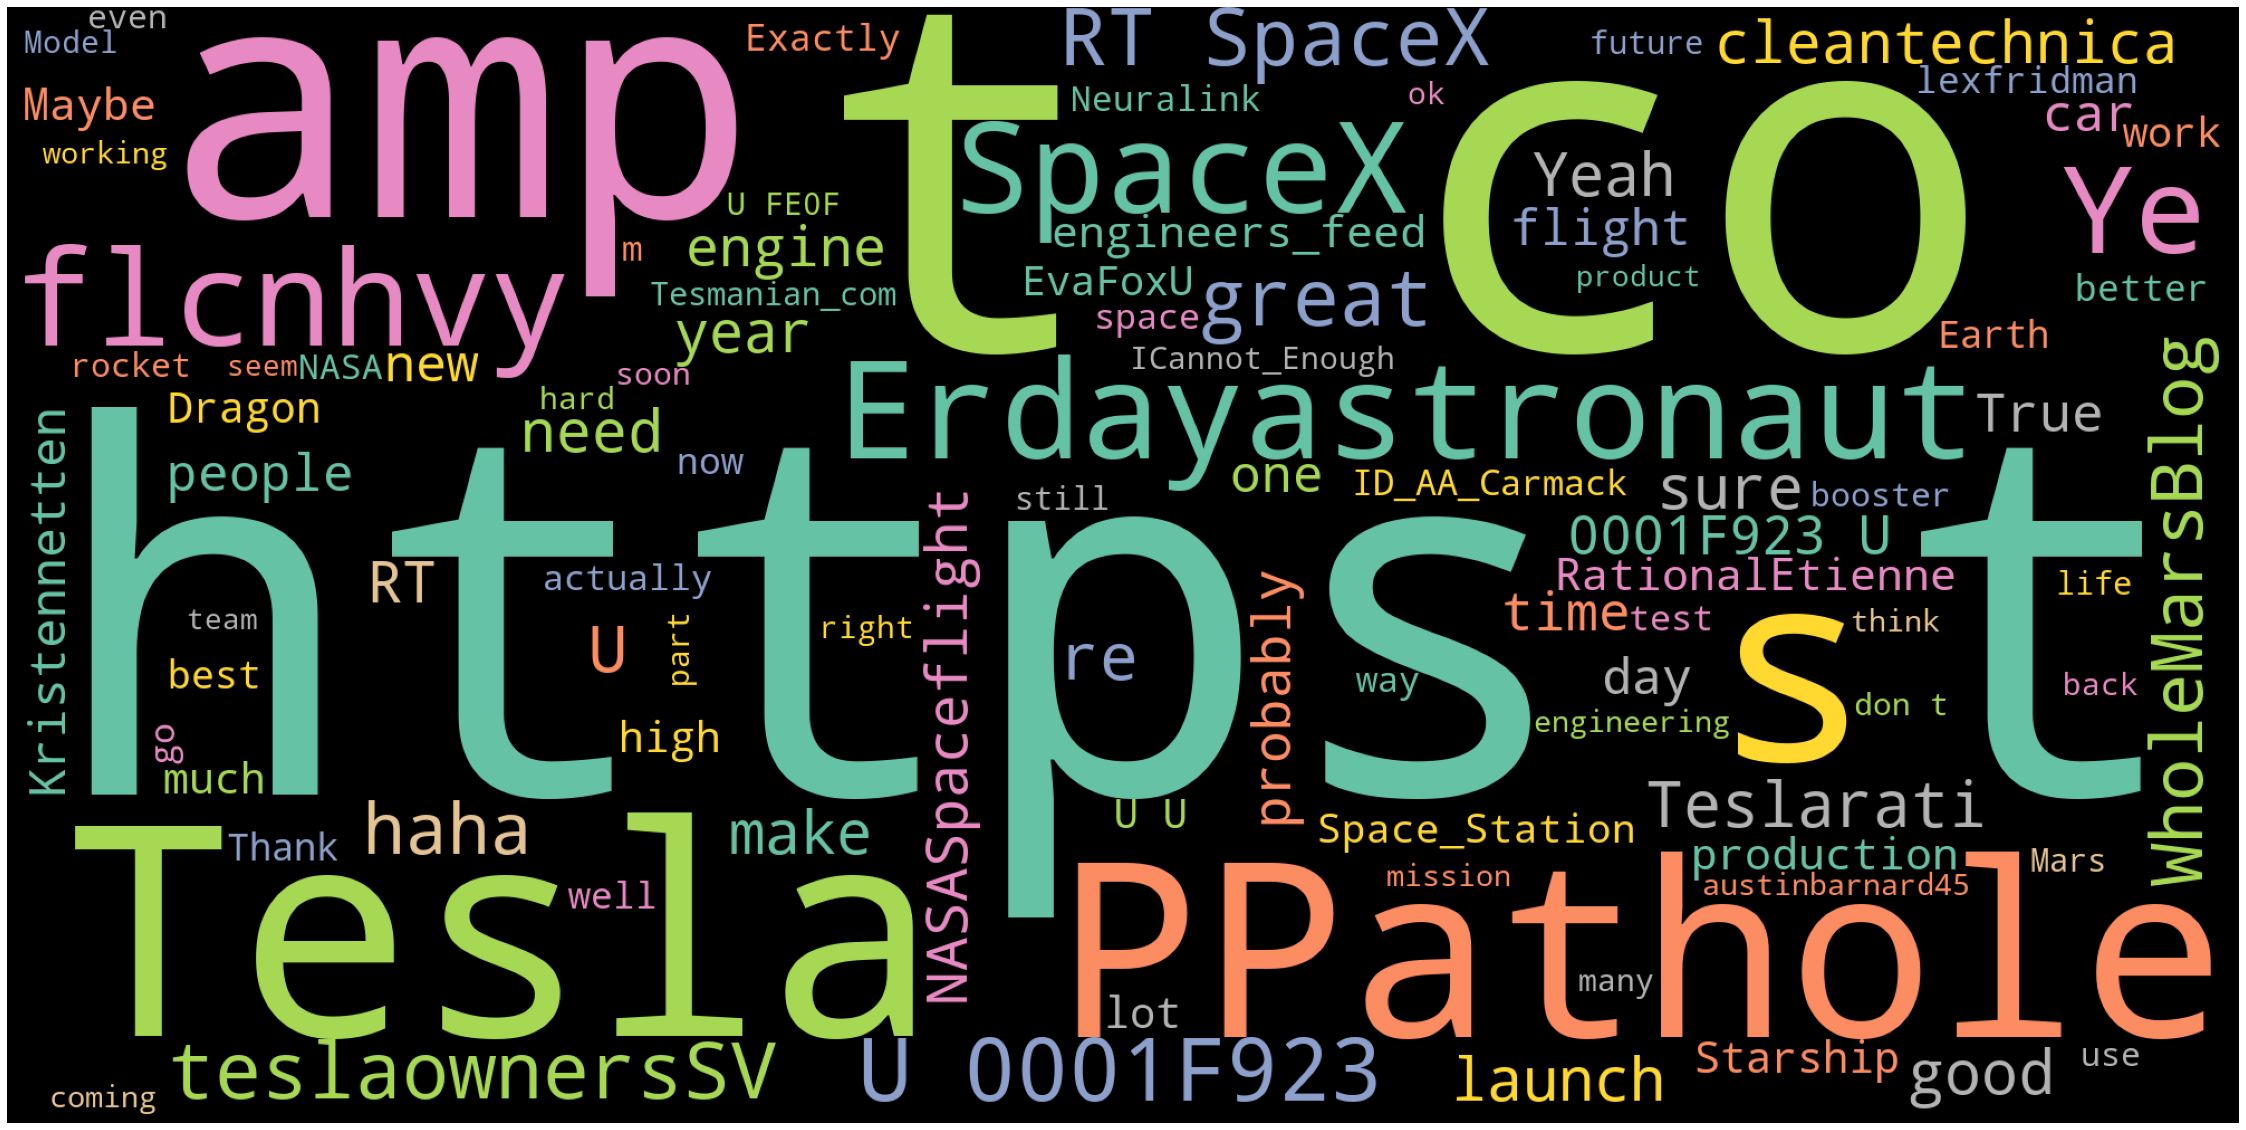

In [28]:
from wordcloud import WordCloud, STOPWORDS
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 2000, height = 1000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [29]:
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(tweets)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

In [31]:
tf_idf_matrix_n_gram_max_features
dense= tf_idf_matrix_n_gram_max_features.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns=vectorizer_n_gram_max_features.get_feature_names())

In [32]:
df

,0001f525,0001f5a4,0001f923,0001f923 0001f923,20,28delayslater,60,about,absolutely,accurate,...,yeah,year,years,yes,you,you can,you re,your,yup,zero
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.305142,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.273076,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1997,0.893098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [33]:
word_list = ' '.join(df)

In [34]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

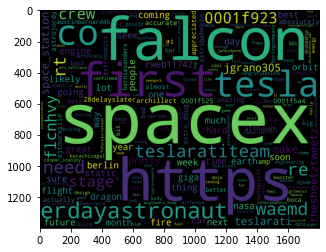

In [35]:
plt.imshow(wordcloud)

## Sentiment Analysis

In [36]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [37]:
positive_words = positive_words[40:]

In [38]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [39]:
negative_words = negative_words[20:]

In [40]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [41]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [42]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [43]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## Conclusion

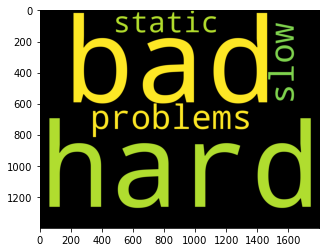

In [44]:
plt.imshow(wordcloud_neg)

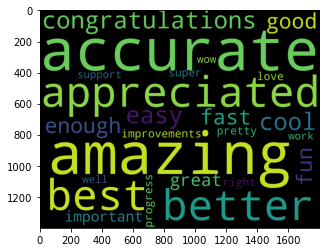

In [45]:
plt.imshow(wordcloud_pos)